<a href="https://colab.research.google.com/github/18k-481/capstone_project/blob/main/aicapstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score
df=pd.read_csv('/content/hypothyroid.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Target
0,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,1
1,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,1
2,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,1
3,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,1
4,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,1


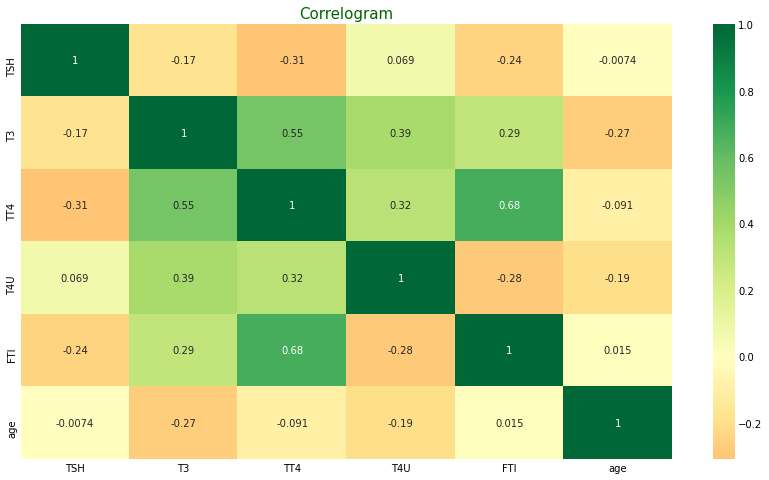

In [ ]:
# Plotting a heatmap to show correlations between variables

corr = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

**Multiple linear regression using gradient** **descent**

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], cost error is 0.023869743914005693


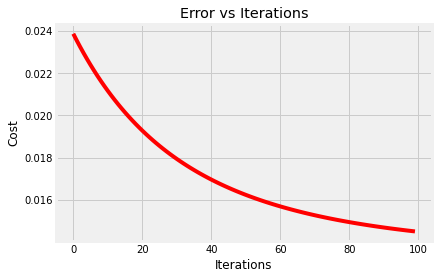

With final theta values of [ 0.03026529  0.00169637  0.00469066 -0.00094621 -0.00342657 -0.00140699
  0.00433603  0.0027065   0.00179867 -0.00081325 -0.00451405 -0.0031109
 -0.00122465  0.00332301  0.0064088   0.069677    0.00317282 -0.01043469
  0.00291933 -0.03259541  0.00288034  0.01258446  0.00287697 -0.02181969], cost error is 0.014485298501066788
Target value is  1


In [ ]:
#without using sklearn library

def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

def gradient_descent(X, y, theta, alpha, iterations):
    cost_array = np.zeros(iterations)
    m = y.size
    for i in range(iterations):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

def run():
    # Import data
    data = pd.read_csv('/content/hypothyroid.csv')

    # Extract data into X and y
    X = data[["age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI"]]
    y = data['Target']

    # Normalize our features
    X = (X - X.mean()) / X.std()

    # Add a 1 column to the start to allow vectorized gradient descent
    X = np.c_[np.ones(X.shape[0]), X] 

    # Set hyperparameters
    alpha = 0.01
    iterations = 100


    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, Theta = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
    theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

    # Display cost chart
    plotChart(iterations, cost_num)

    final_cost, Theta= cost_function(X, y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
    #predicting the target value by giving random values of attributes
    y_pred=np.dot(theta[1:24],[55,1,0,0,0,0,0,0,0,0,0,0,0,1,15,1,1.6,1,2.5,1,5,1,1.9])+theta[0:1]
    print("Target value is ",int(y_pred))
    

run()

**Using Random Forest**

In [ ]:

# Selecting the independent variables and the target variable
X = df.drop('Target',axis=1)

#y = np.where(df.status == 'hypothyroid', 1, 0)
y=df['Target']

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions

y_pred = rf.predict(X_test)
#print(y_pred)

# Measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)
#storing accuracy value
acs=accuracy_score(y_test, y_pred)
print(acs)

The accuracy score is: 0.9852476290832455 and the f1 score is 0.8205128205128205


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.82      0.82      0.82        39

    accuracy                           0.99       949
   macro avg       0.91      0.91      0.91       949
weighted avg       0.99      0.99      0.99       949

0.9852476290832455


# **SVM**





In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting the independent variables and the target variable

X = df.drop('Target',axis=1)
y = df["Target"]

# Instantiating and creating a list of models for iteration

poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names

models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model

def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
asc=[]
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')
  asc.append(predictor(model,X,y)[0])
 # asc1=predictor(model,X,y)[]
  #asc2=predictor(model,X,y)[2]
print(asc)

The accuracy score of Polynomial is: 0.9726027397260274 and the f1 score is: 0.6285714285714286
The accuracy score of Linear     is: 0.9747102212855637 and the f1 score is: 0.6923076923076923
The accuracy score of Rbf        is: 0.9768177028451 and the f1 score is: 0.6857142857142857
[0.9726027397260274, 0.9747102212855637, 0.9768177028451]


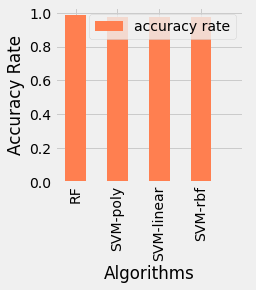

In [ ]:
#ploting the accuracy rates
graph={"RF":acs,"SVM-poly":asc[0],"SVM-linear":asc[1],"SVM-rbf":asc[2]}
dfg=pd.DataFrame(graph.items(), columns=['Model','accuracy rate'])
dfg.plot(kind='bar', color='coral',figsize=(3,3))
plt.xlabel('Algorithms')
plt.xticks([0,1,2,3,4],["RF",'SVM-poly',"SVM-linear","SVM-rbf"," "])
plt.ylabel('Accuracy Rate')
plt.style.use('fivethirtyeight')
plt.show()